In [2]:
# titanic csv import 
import pandas as pd

train_df = pd.read_csv('./datasets/titanic_train.csv')
test_df = pd.read_csv('./datasets/titanic_test.csv')
test_label_df = pd.read_csv('./datasets/titanic_gender_submission.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_df.groupby(['Sex' , 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

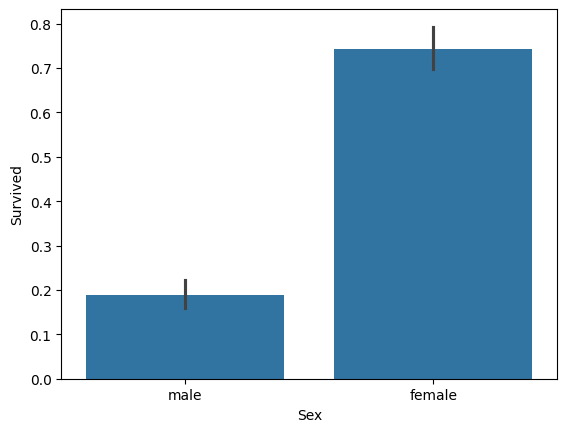

In [10]:
import seaborn as sns

sns.barplot(x='Sex', y='Survived', data=train_df)

In [11]:
titanic_train_df = train_df[['Pclass' , 'Sex', 'Age' , 'Survived']]
titanic_test_df = test_df[['Pclass' , 'Sex', 'Age']]

In [12]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
result_train = encoder.fit_transform(titanic_train_df['Sex'])
result_test = encoder.fit_transform(titanic_test_df['Sex'])
# print(result)
titanic_train_df['Sex']=result_train
titanic_test_df['Sex']=result_test

C:\Users\LG\AppData\Local\Temp\ipykernel_5324\3911742394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train_df['Sex']=result_train
C:\Users\LG\AppData\Local\Temp\ipykernel_5324\3911742394.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_test_df['Sex']=result_test


In [13]:
titanic_train_df

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
886,2,1,27.0,0
887,1,0,19.0,1
888,3,0,NaN,0
889,1,1,26.0,1


In [16]:
import numpy as np 
from sklearn.base import BaseEstimator 

class MyDummyClassifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==1:
                pred[i]= 0 
            else:
                pred[i]= 1
            return pred 

In [21]:
myclf = MyDummyClassifier()
pred = myclf.predict(titanic_train_df)


In [22]:
y_test = titanic_train_df['Survived']

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.6161616161616161

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()
len(digits.data)

1797

In [40]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [42]:
import pandas as pd

digits_df = pd.DataFrame(digits.data , columns=digits.feature_names)

In [43]:
digits_df['label'] = digits.target

In [44]:
digits_df.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [45]:
digits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [47]:
digits_df['label'].value_counts()

label
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [48]:

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [49]:
(1797-179)/1797

0.9003895381190874

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data,y,random_state=11)


print('레이블의 테스트세트 크기',y_test.shape)
print('테스트레이블의 0과1의 분포도')
print(pd.Series(y_test).value_counts())

# 
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든예측을 0으로하여도 정확도는{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블의 테스트세트 크기 (450,)
테스트레이블의 0과1의 분포도
0    405
1     45
Name: count, dtype: int64
모든예측을 0으로하여도 정확도는0.900


In [53]:
((1/10) + (1/50))/2

0.060000000000000005

In [54]:
100/6

16.666666666666668